## Chapter 12 : Optimization
- **Convexity**
  - Convex set : for any $a, b \in \mathcal X$, given $\lambda \in [0, 1]$, $\lambda a + (1 - \lambda) b \in \mathcal X$.
  - Convex function : for any function $f : \mathcal X \rightarrow \mathbb R$, we have $\lambda f(x) + (1 - \lambda) f(x') >= f(\lambda x + (1-\lambda)x')$.
  - jensen's inequality : $\sum_i\alpha_if(x_i)\geq f\left(\sum_i\alpha_ix_i\right)$ and $E_X[f(X)]\geq f\left(E_X[X]\right)$
  - Properties : Local Minima Are Global Minima, below set $\mathcal{S}_b\overset{\mathrm{def}}{\operatorname*{=}}\{x|x\in\mathcal{X}\mathrm{~and~}f(x)\leq b\}$ is also a convex set, f is convex if hessian of f is positive semidefinite ($\nabla^2 f = H, x^THx >= 0$).
  - Convex with constraint $c_i(x) <= 0$, can be dealed with lagrangian, and the KKT condition. KKT are:
    - Stationarity : $\nabla_x L(f(x), \lambda_1, \ldots, \lambda_n) = 0$.
    - Primal Feasibility : $c_i(x) <= 0$
    - Dual Feasibility : $\lambda_i >= 0$
    - Complementary Slackness : $\lambda_i c_i(x) = 0$
  - Penality is robust than constraint. We can also use projection to satisfy constraints.
- **Gradient Descent**
  - $x \leftarrow x - \eta \nabla_x f(x)$, with newton's method $\eta = \nabla_x^{-2} f(x) = H^{-1}$
  - H is expensive, so we can use precondition $x \leftarrow x - \eta \text{diag}(H)^{-1}\nabla_x f(x)$, this means for different $x_i$ we use different learning rates.
  - Line search : use binary search to find $\eta$ that minimize $f(x - \eta \nabla_x f(x))$.
- **SGD**： converge with rate $\mathcal O (1/\sqrt T)$, $T$ is the sample number. More details of the math please see the book.
- **Momentum**
  - Use leaky average $v_k = \beta v_{k-1} + g_{k, k-1}$ as the gradient, this is the momentum!
  - Gradient descent with and without momentum for a convex quadratic function decomposes into coordinate-wise optimization in the direction of the eigenvectors of the quadratic matrix.
  - The velocity converge condition is loose than gradient converge condition, so add momentum (with big $\beta$ ) is theoritaly better.
- **Adagrad** : it is a SGD alg
  - Some features are rare, so we want to update it faster ( we do not update their gradient much ).
  - Some problem has large condition number $k = \lambda_{max} / \lambda_{min}$, which is not good. We can rescale them by some matrix (if Hessian of the problem L is possitive semidefinite), or just rescalse the diag of the Q. $\tilde Q = \text{diag}(Q)^{-1/2}Q\text{diag}(Q)^{-1/2}$. However this is not realistic in DL, because we don't have second derivitive of Q, so Adagrad use the norm of the gradient as the scalse item. And this makes it adjust element wise (like only diag will change).
  - $s_t = s_{t-1} + g_t^2, w_t = w_t - \eta / \sqrt{s_t+\epsilon} \odot g_t$, one problem of Adagrad is that it's learning rate decrease $\mathcal O(t^{-1/2})$.
- **RMSProp**
  - $s_t = \gamma s_{t-1} + (1-\gamma) g_t^2$, only difference with Adagrad
- **Adadelta**
  - $\mathbf{s}_{t}=\rho \mathbf{s}_{t-1}+(1-\rho) \mathbf{g}_{t}^{2}$, $\mathbf{g}_{t}^{\prime}=\frac{\sqrt{\Delta \mathbf{x}_{t-1}+\epsilon}}{\sqrt{\mathbf{s}_{t}+\epsilon}} \odot \mathbf{g}_{t}$, $x_t = x_t - \mathbf{g}_{t}^{\prime}$, $\Delta\mathbf{x}_{t}=\rho\Delta\mathbf{x}_{t-1}+( 1-\rho) \mathbf{g}_{t}^{\prime\, 2}, $.
- **Adam**
  - $v_t = \beta_1 v_{t-1} + (1-\beta_1)g_{t}$, $s_t = \beta_2 s_{t-1} + (1-\beta_2)g^2_{t}$, and the rescale it (otherwise the initial numbers are too diverge from gradient), $\hat v_t = v_t / (1 + \beta_1^t)$, $\hat s_t = s_t / (1 + \beta_2^t)$. Then finnally $x_t = x_t - \eta \hat v_t / (\sqrt{\hat s_t} + \epsilon)$
  - One of the problems of Adam is that it can fail to converge even in convex settings when the second moment estimate in $s_t$ blows up as $g^2_t$ being too large and forget the history. Yogi update is $s_t = s_{t-1} + (1-\beta_2)g^2_{t} \odot (g^2_{t} - s_{t-1})$, the update is not the deviation of $g^2_{t} - s_{t-1}$, it is $g^2_{t}$ with regard to the sign.
- Scheduler
  - Warmup: In particular they find that a warmup phase limits the amount of divergence of parameters in very deep networks. A closer look at deep learning heuristics: learning rate restarts, warmup and distillation. ArXiv:1810.13243.
<!-- <img alt="ResNeXt Block" src="https://d2l.ai/_images/rnn.svg" style="background-color: white; display: inline-block;"> -->
<!-- <img alt="ResNeXt Block" src="https://d2l.ai/_images/rnn-bptt.svg" style="background-color: white; display: inline-block;"> -->

In [1]:
import collections
import math
import torch
from torch import nn
from torch.nn import functional as F
from torchinfo import summary
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [25]:
import numpy as np
def f(x):
    return np.log(np.exp(x) + np.exp(-2 * x - 3))

def f_gradient(x):
    return (np.exp(x) - 2 * np.exp(-2 * x - 3)) / f(x)
    
def gradient_descent(f, f_g, start, step, tol, eta, with_line_search = False):
    points = [start]
    for i in range(step):
        if with_line_search:
            eta = 
        start = start - eta * f_g(start)
        points.append(start)
    return points

def plot_function(f, xlim, num, x = None):
    if x is None:
        x = np.linspace(xlim[0], xlim[1], num)
        y = f(x)
        plt.plot(x, y)
    else:
        y = f(np.array(x))
        plt.plot(x, y, 'ro-', linewidth=3)

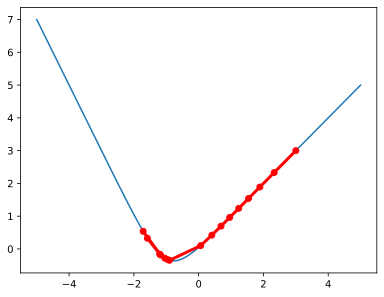

In [29]:
plot_function(f, (-5, 5), 100)
points = gradient_descent(f, f_gradient, 3, 15, 0.1, 0.1)
plot_function(f, (-5, 5), 100, points)
plt.show()

In [32]:
def get_data_ch11(batch_size=10, n=1500):
    data = np.genfromtxt(download('airfoil'),
                         dtype=np.float32, delimiter='\t')
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    data_iter = load_array((data[:n, :-1], data[:n, -1]),
                               batch_size, is_train=True)
    return data_iter, data.shape[1]-1
    
def train_concise_ch11(trainer_fn, hyperparams, data_iter, num_epochs=4):
    # 初始化模型
    net = nn.Sequential(nn.Linear(5, 1))
    def init_weights(m):
        if type(m) == nn.Linear:
            torch.nn.init.normal_(m.weight, std=0.01)
    net.apply(init_weights)

    optimizer = trainer_fn(net.parameters(), **hyperparams)
    loss = nn.MSELoss(reduction='none')
    animator = Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            optimizer.zero_grad()
            out = net(X)
            y = y.reshape(out.shape)
            l = loss(out, y)
            l.mean().backward()
            optimizer.step()
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                # MSELoss计算平方误差时不带系数1/2
                animator.add(n/X.shape[0]/len(data_iter),
                             (evaluate_loss(net, data_iter, loss) / 2,))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.avg():.3f} sec/epoch')

loss: 0.242, 0.011 sec/epoch


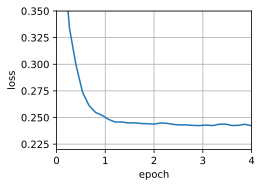

In [39]:
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'
DATA_HUB = {}
DATA_HUB['airfoil'] = (DATA_URL + 'airfoil_self_noise.dat',
                           '76e5be1548fd8222e5074cf0faae75edff8cf93f')
data_iter, _ = get_data_ch11(10)
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

loss: 0.243, 0.010 sec/epoch


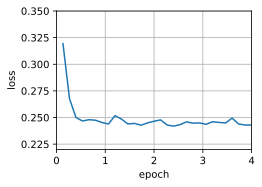

In [42]:
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.01, 'momentum': 0.5}, data_iter)

loss: 0.281, 0.010 sec/epoch


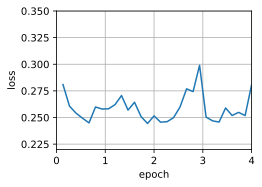

In [43]:
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.01, 'momentum': 0.9}, data_iter)

loss: 0.243, 0.011 sec/epoch


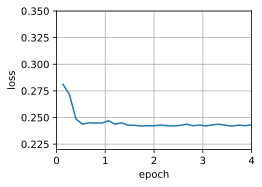

In [46]:
train_concise_ch11(torch.optim.Adagrad, {'lr': 0.1}, data_iter)

In [49]:
from torch.optim import lr_scheduler
net = nn.Sequential()
net.append(nn.LazyLinear(16))
net.append(nn.LazyLinear(1))
optimizer = torch.optim.SGD(net.parameters(), 0.01)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30], gamma=0.5)

In [38]:
from IPython import display
import time
import os
import requests

reduce_sum = lambda x, *args, **kwargs: x.sum(*args, **kwargs)
size = lambda x, *args, **kwargs: x.numel(*args, **kwargs)

def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator.

    Defined in :numref:`sec_utils`"""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

def download(url, folder='../../Data', sha1_hash=None):
    """Download a file to folder and return the local filepath.

    Defined in :numref:`sec_utils`"""
    if not url.startswith('http'):
        # For back compatability
        url, sha1_hash = DATA_HUB[url]
    os.makedirs(folder, exist_ok=True)
    fname = os.path.join(folder, url.split('/')[-1])
    # Check if hit cache
    if os.path.exists(fname) and sha1_hash:
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname
    # Download
    print(f'Downloading {fname} from {url}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname
    
class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        """Defined in :numref:`sec_utils`"""
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
      
def evaluate_loss(net, data_iter, loss):
    """Evaluate the loss of a model on the given dataset.

    Defined in :numref:`sec_utils`"""
    metric = Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = torch.reshape(y, out.shape)
        l = loss(out, y)
        metric.add(reduce_sum(l), size(l))
    return metric[0] / metric[1]
    
class Timer:
    """Record multiple running times."""
    def __init__(self):
        """Defined in :numref:`sec_minibatch_sgd`"""
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()
        
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib.

    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    
class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        """Defined in :numref:`sec_utils`"""
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)